# Computergestützte Mathematik

Vorlesung vom 15.11.2018

R. Braun

In [1]:
#%matplotlib notebook
# %matplotlib notebook muss vor dem Import von pyplot stattfinden
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import itertools

#### Plotverschönerung

In [3]:
linestyles = ['-', '--', '-.', ':']

`zip` um zwei Listen zusammenzuführen

In [4]:
for nr, z in zip([1,2,3], ['a','b','c','d']):
    print(nr, z) 

1 a
2 b
3 c


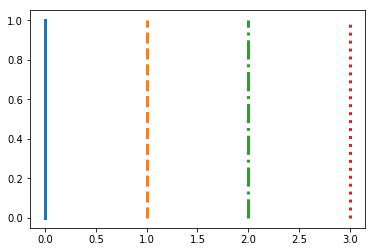

In [5]:
for l, i in zip(linestyles, itertools.count()):
    plt.plot([i, i], [0, 1], l, linewidth=3)
plt.show()

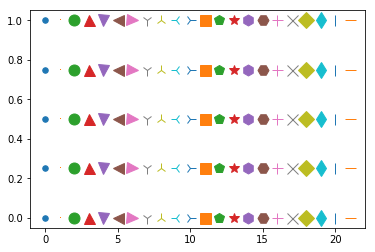

In [6]:
markers = ['.', ',', 'o', '^', 'v', '<', '>', '1', '2', '3', '4', 's', 'p',]
markers += ['*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
y = np.linspace(0, 1, 5)
x = np.zeros_like(y)
for m, i in zip(markers, itertools.count()):
    plt.plot(x+i, y, m, markersize=11)

#### Broadcasting

Wenn zwei Array mit unterschiedlichen Shapes miteinander verknüpft werden und es eine gemeinsame Shape gibt, die beide umfasst, so werden beide Array auf diese Shape aufgefüllt.  Dasselbe gilt für die Verknüpfung von Array mit Skalaren.

In [7]:
x

array([0., 0., 0., 0., 0.])

In [8]:
x + 1

array([1., 1., 1., 1., 1.])

In [9]:
x = np.arange(3)
y = np.arange(4).reshape((-1,1)) # <-  -1 = der Rest
x

array([0, 1, 2])

In [10]:
y

array([[0],
       [1],
       [2],
       [3]])

In [11]:
x * y

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4],
       [0, 3, 6]])

Wenn Broadcasting nicht hilft, verwendet man die konstanten Array `zeros` und `ones`

In [12]:
np.zeros(3), np.ones(4)

(array([0., 0., 0.]), array([1., 1., 1., 1.]))

In [13]:
z = np.ones_like(np.arange(10))
z

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
type(z)

numpy.ndarray

In [15]:
z.dtype

dtype('int64')

#### Ebene parametrische Plots

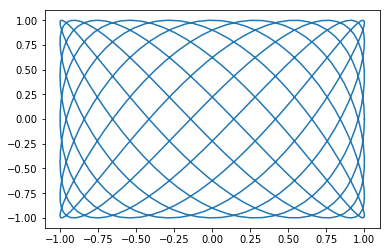

In [16]:
t = np.linspace(0, 2*np.pi, 550)
plt.plot(np.cos(7*t), np.sin(11*t));

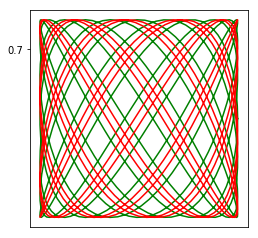

In [17]:
plt.plot(np.cos(7*t), np.sin(11*t), 'g')
plt.plot(np.cos(.1+7*t), np.sin(11*t), 'r')
plt.axis('image')
plt.xticks([])  # <-  leere Liste: keine Ticks
plt.yticks([.7]);

Polarplot

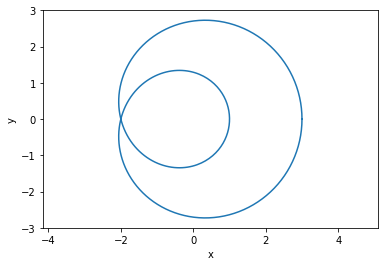

In [18]:
t = np.linspace(0, 2*np.pi, 250)
r = 2 + np.cos(t)
phi = 2*t
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal');

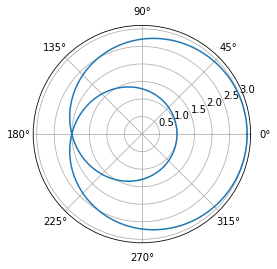

In [19]:
plt.polar(phi, r);

Polygonzüge

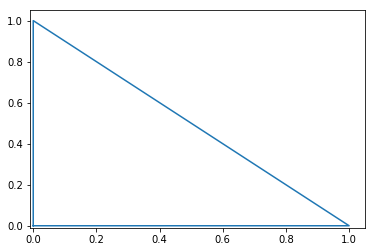

In [20]:
dreieck = [[0,0], [1,0], [0,1], [0,0]]
plt.plot([0,1,0,0], [0,0,1,0])
plt.axis(xmin=-.01,ymin=-.01);

In [21]:
def n_eck(n):
    x = [np.sin(2*np.pi*j/n) for j in range(n+1)]
    y = [np.cos(2*np.pi*j/n) for j in range(n+1)]
    return x, y

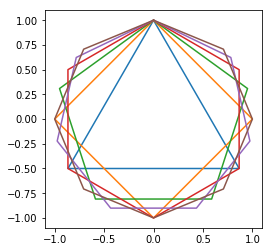

In [22]:
for n in range(3, 9):
    plt.plot(*n_eck(n))  # <- Auspacken
plt.axis('image');

Ohne Auspacken

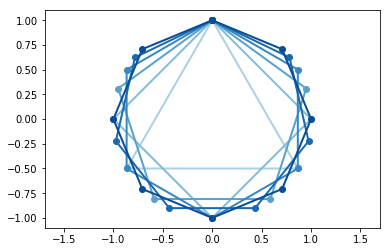

In [23]:
for n in range(3, 9):
    x, y = n_eck(n)
    farbe = plt.cm.Blues(n/9)
    plt.plot(x, y, color=farbe, linewidth=2)
    plt.plot(x, y, 'o', color=farbe)
plt.axis('equal');

In [24]:
plt.cm.viridis(.95)

(0.876168, 0.891125, 0.09525, 1.0)

#### 3D-Plots

In [25]:
from mpl_toolkits.mplot3d import Axes3D
# der Import definiert einige Klassen um
# Axes3d selbst brauchen wir gar nicht

In [26]:
xn = np.linspace(-3*np.pi, 3*np.pi)
yn = np.linspace(-3*np.pi, 3*np.pi)
X, Y = np.meshgrid(xn, yn)
X.shape

(50, 50)

In [27]:
Z = np.cos(np.sqrt(X**2+Y**2))

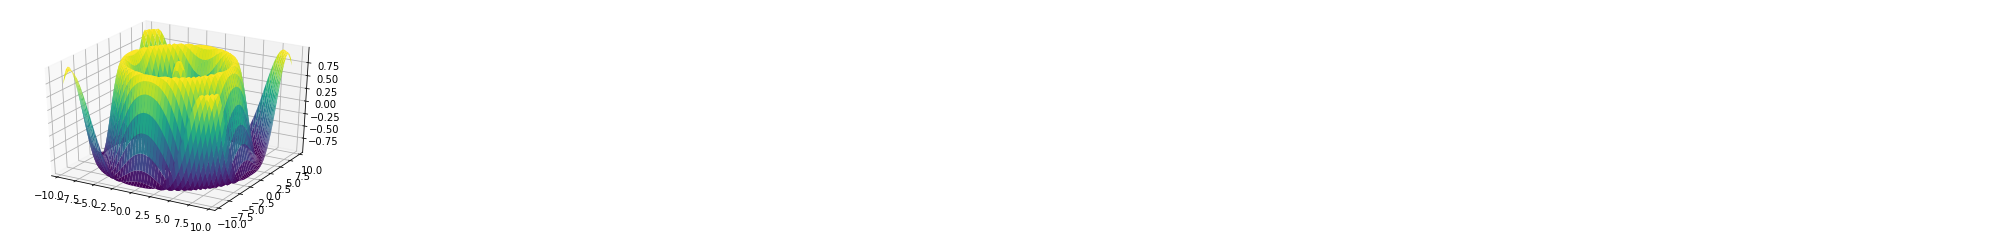

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 1x1-Matrix von Plots, davon Element 1
#ax.plot_surface(X, Y, Z, cmap=plt.cm.plasma)
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis, rstride=1, cstride=1, linewidth=2)
plt.savefig('test.pdf')

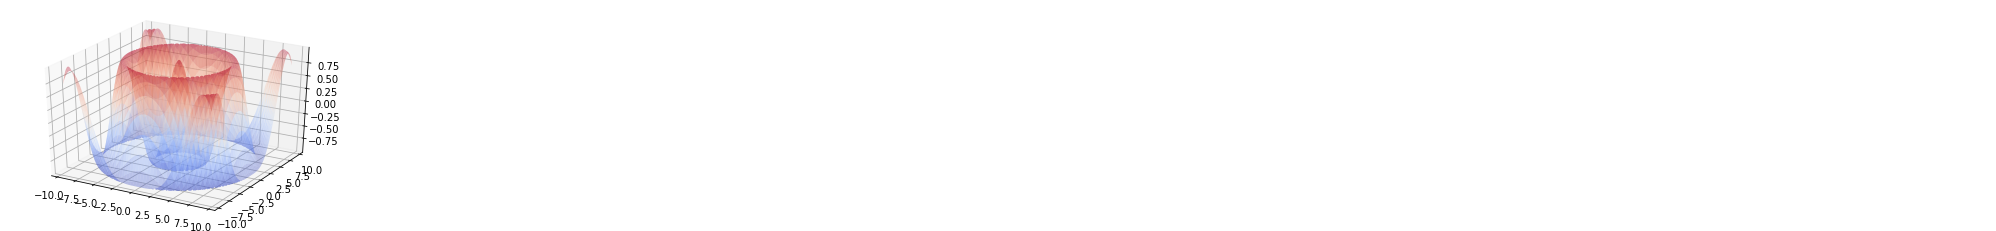

In [29]:
xn = np.linspace(-3*np.pi, 3*np.pi, 200)
yn = np.linspace(-3*np.pi, 3*np.pi, 200)
X, Y = np.meshgrid(xn, yn)
Z = np.cos(np.sqrt(X**2+Y**2))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, alpha=.35);

Wenn's schnell gehen soll

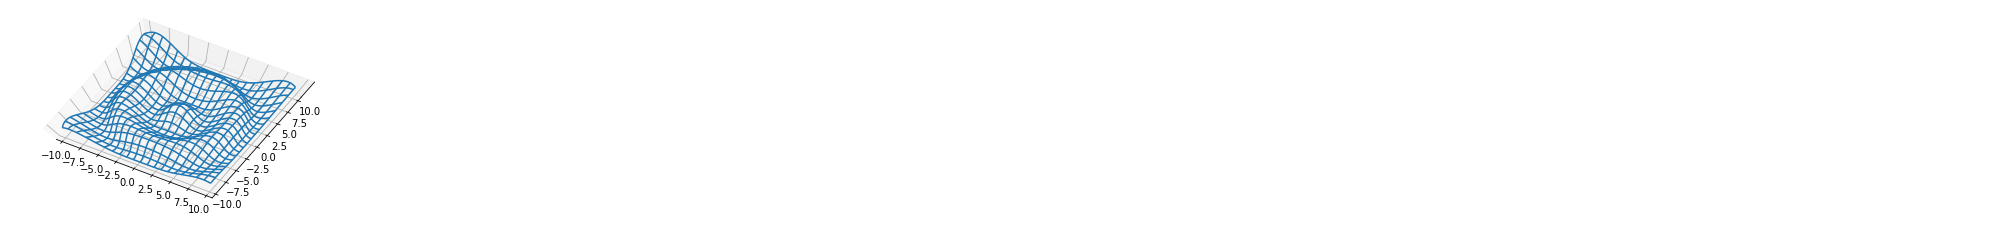

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.view_init(84,-60);
ax.set_zticks([]);

In [31]:
xn = np.linspace(-2, 2, 150)
yn = np.linspace(-2, 2, 150)
X, Y = np.meshgrid(xn, yn)
Z = np.exp((X**2+Y**2)**.25)

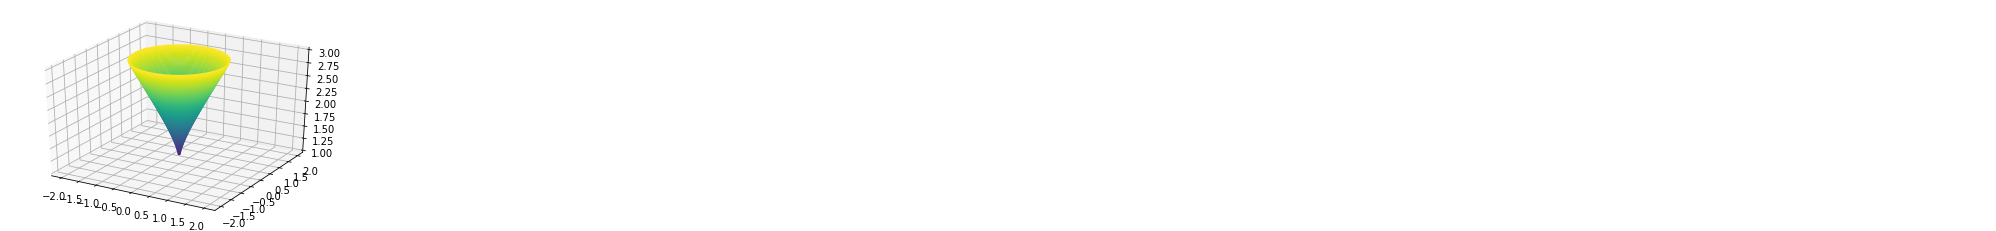

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour(X, Y, Z, levels=np.linspace(.95, 3, 120))
ax.set_zlim3d(bottom=1, top=3);

In [33]:
def f(x, y):
    return (x**2+y**2)**2 + 3*x**2*y - y**3

In [34]:
x = np.linspace(-1.1, 1.1, 701)
y = np.linspace(-1.1, 1.1, 701)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

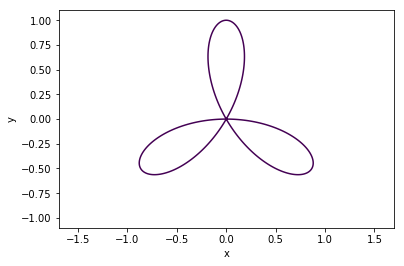

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.contour(X, Y, Z, levels=[0])
ax.axis('equal');

In [36]:
from skimage import measure 

In [37]:
contours = measure.find_contours(Z, 0)
len(contours)

3

In [38]:
contours[0]

array([[350.        , 350.        ],
       [349.        , 349.66456482],
       [348.51120793, 349.        ],
       ...,
       [349.99541679, 348.        ],
       [349.99842113, 349.        ],
       [350.        , 350.        ]])

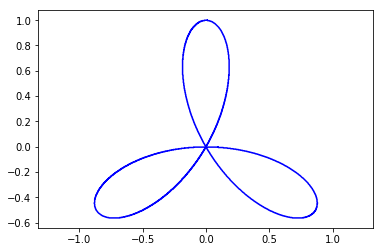

In [39]:
for c in contours:
    ci = c.astype(int)
    plt.plot(x[ci[:, 1]], y[ci[:, 0]], 'b')
plt.axis('equal');

In [40]:
xn = np.linspace(-1.1, 1.1)
yn = np.linspace(-1.1, 1.1)
zn = np.linspace(-1.1, 1.1)
X, Y , Z = np.meshgrid(xn, yn, zn)
h = X**2 + Y**2 + Z**2

In [41]:
verts, faces, normals, values = measure.marching_cubes_lewiner(h, 1)

In [42]:
faces[0]

array([2, 1, 0], dtype=int32)

In [43]:
verts[0]

array([ 2.9699008, 19.       , 23.       ], dtype=float32)

In [44]:
faces.shape

(18716, 3)

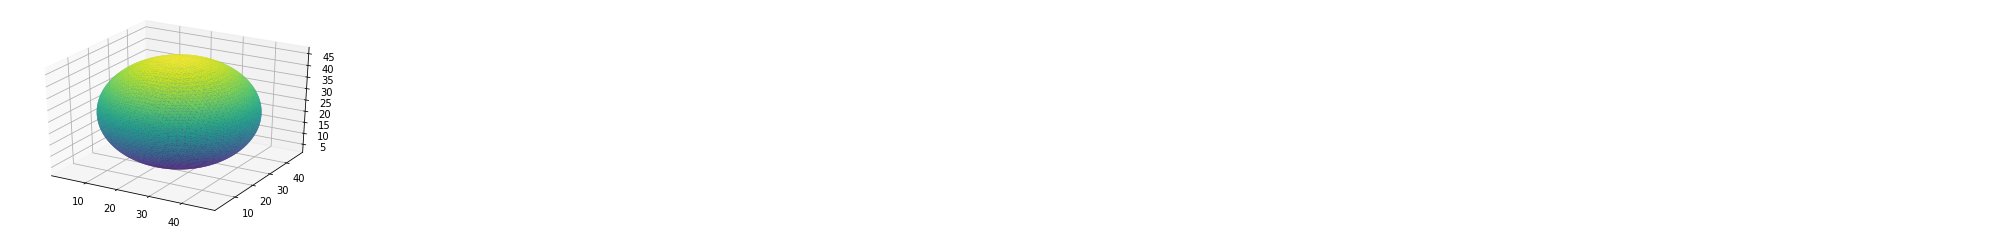

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:, 2], cmap=plt.cm.viridis);

Die Ecken der Dreiecke sind in dem Raum der Indices interpoliert.  Das heißt die Achsenbeschriftung ist falsch.

Beim nächsten Beispiel beheben wir dieses Problem durch Interpolation.

In [46]:
np.interp(2.3, [1,2,3], [1,2,4])

2.5999999999999996

In [47]:
xn = np.linspace(-1.8, 1.2)
yn = np.linspace(-1.3, 1.3)
zn = np.linspace(-1.3, 1.3)
X, Y, Z = np.meshgrid(xn, yn, zn)
h = Y**2 - (X-1)*(X+1)**2 - Z**2

In [48]:
verts, faces, n, v = measure.marching_cubes_lewiner(h, 0)  
len(faces)

20098

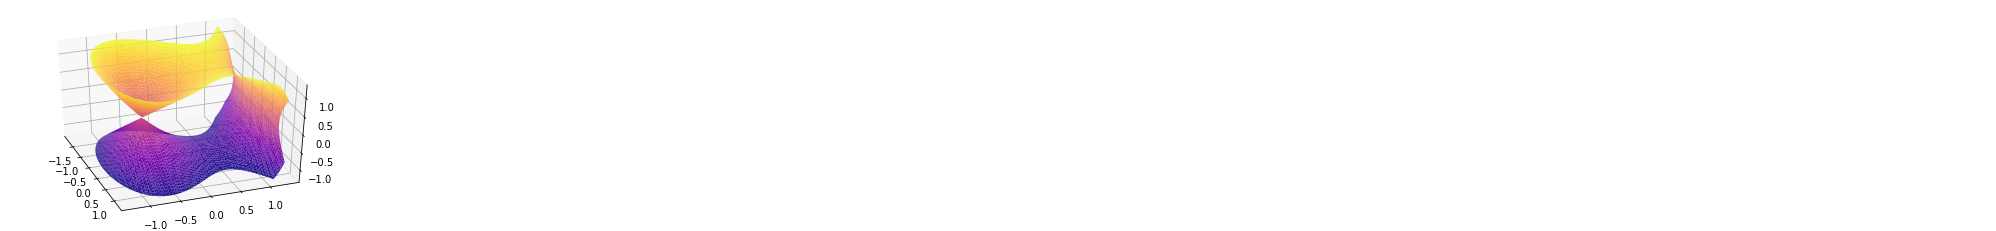

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xi = np.interp(verts[:,0], np.arange(len(xn)), xn)
yi = np.interp(verts[:,1], np.arange(len(yn)), yn)
zi = np.interp(verts[:,2], np.arange(len(zn)), zn)
ax.plot_trisurf(xi, yi, faces, zi, cmap=plt.cm.plasma)
ax.view_init(38, -20); 

## Nicht vergessen

Ab nächster Woche CompLA um 10:30, CompAna um 11:30